In [1]:
%run /Users/hhg/Research/kinematic_lensing/code/BinnedFit/gaussFit_spec2D.py
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_dir  =  "/Users/hhg/Research/kinematic_lensing/code/BinnedFit/notebook/data/"
fname_data        = data_dir+"mock2DSpec_sini1.0_sW0.3_sOff0.0.npy"
fname_grid_lambda = data_dir+"obsLambda.npy"
data_info = load_data(fname_data,fname_grid_lambda)

In [3]:
lambda0 = 656.461
redshift = 0.2

In [4]:
fit_tool = gaussFit_spec2D(data_info,lambda0,redshift)

In [5]:
v_min = np.min(fit_tool.grid_lambda)  ; v_MAX = np.max(fit_tool.grid_lambda)
x_min = np.min(fit_tool.grid_pos)     ; x_MAX = np.max(fit_tool.grid_pos)

In [6]:
fit_tool.data.shape

(256, 160)

### get peak info

In [7]:
peak_info = get_peak_info(data=fit_tool.data,grid_spec=fit_tool.grid_lambda)

In [8]:
peak_info['peak_id'].shape

(256,)

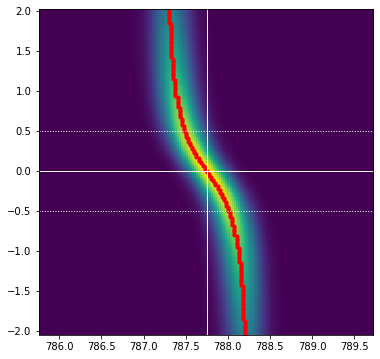

In [9]:
#%matplotlib
%matplotlib inline

ncol=1

fig,ax = plt.subplots(1,ncol,figsize=(6,6))
ax.imshow(fit_tool.data,extent=[v_min, v_MAX, x_min, x_MAX ], aspect='auto')

ax.plot(peak_info['peak_loc'],np.flip(fit_tool.grid_pos),color='red', marker='o', markersize=3,ls='none')

vcen = lambda0*(1.+redshift)

ax.axhline(y=0.0    ,color='white' , linestyle='-',lw=1)
ax.axhline(y=0.5    ,color='white' , linestyle=':',lw=1)
ax.axhline(y=-0.5   ,color='white', linestyle=':' ,lw=1)
ax.axvline(x=vcen    ,color='white', linestyle='-',lw=1)
#ax.axvline(x=vcen+100,color='white', linestyle=':',lw=1)
#ax.axvline(x=vcen-100,color='white', linestyle=':',lw=1)
#ax.axvline(x=vcen+200,color='white', linestyle=':',lw=1)
#ax.axvline(x=vcen-200,color='white', linestyle=':',lw=1)
    
#ax.set_xlim(-220,220)
#ax.set_ylim(-1.5,1.5)

plt.show()

### 1D gaussian fit

In [10]:
row_id=0
flux     = fit_tool.data[row_id]

In [11]:
start_cen = peak_info['peak_loc'][row_id]
print(start_cen)
start_amp = peak_info['peak_flux'][row_id]
print(start_amp)

787.3031999999986
1129.9287306282056


In [12]:
best_vals=fit_tool._fit_Gauss1D_at_pos(data=fit_tool.data,pos_id=row_id,grid_spec=fit_tool.grid_lambda)
best_vals

array([7.87308086e+02, 4.47877373e+02, 1.58056095e-01])

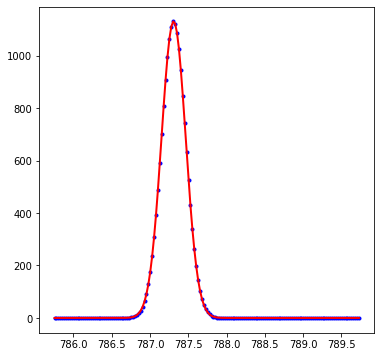

In [13]:
#%matplotlib
%matplotlib inline
fig,ax = plt.subplots(1,1,figsize=(6,6))

ax.plot(fit_tool.grid_lambda,flux,color='blue', marker='o', markersize=3,ls='none')

ax.plot(fit_tool.grid_lambda,gaussian(fit_tool.grid_lambda,*best_vals),linewidth=2,color='r')

In [14]:
fitted_peakLoc,fitted_amp,fitted_sigma = fit_tool.fit_spec2D(data=fit_tool.data,grid_spec=fit_tool.grid_lambda)

time cost: 0.21954607963562012 (secs)


### gen_model_spec2D

In [15]:
model = fit_tool.gen_model_spec2D(fitted_peakLoc,fitted_amp,fitted_sigma,grid_spec=fit_tool.grid_lambda)

In [16]:
data = fit_tool.data

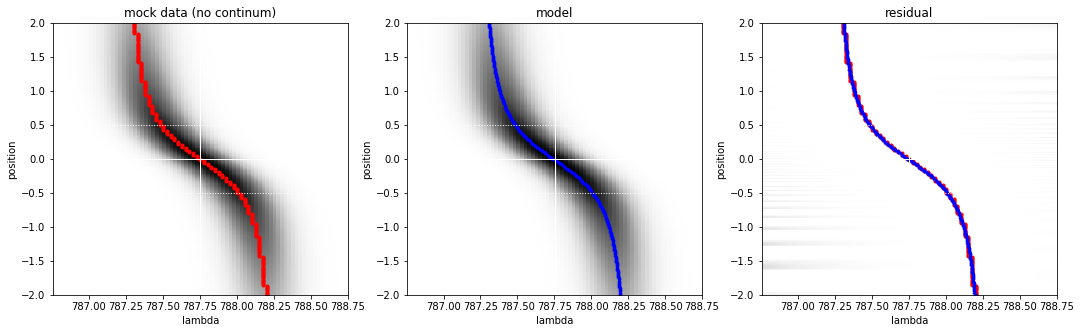

In [17]:
#%matplotlib
%matplotlib inline

ncol=3

fig,ax = plt.subplots(1,ncol,figsize=(18,5))
#ax[0].imshow(np.sum(modelGrid,axis=2))
ax[0].imshow(data ,extent=[v_min, v_MAX, x_min, x_MAX ], aspect='auto',cmap='Greys',vmin=0)
ax[1].imshow(model,extent=[v_min, v_MAX, x_min, x_MAX ], aspect='auto',cmap='Greys',vmin=0)
ax[2].imshow((data-model)/data,extent=[v_min, v_MAX, x_min, x_MAX ], aspect='auto',cmap='Greys',vmin=0)

ax[0].plot(peak_info['peak_loc'],np.flip(fit_tool.grid_pos),color='red', marker='o', markersize=3,ls='none')
ax[1].plot(fitted_peakLoc       ,np.flip(fit_tool.grid_pos),color='blue', marker='^', markersize=3,ls='none')

ax[2].plot(peak_info['peak_loc'],np.flip(fit_tool.grid_pos),color='red', marker='o', markersize=3,ls='none')
ax[2].plot(fitted_peakLoc       ,np.flip(fit_tool.grid_pos),color='blue', marker='^', markersize=3,ls='none')


vcen = lambda0*(1.+redshift)

for j in range(ncol):
    ax[j].axhline(y=0.0,color='white', linestyle='-',lw=1)
    ax[j].axhline(y=0.5,color='white', linestyle=':',lw=1)
    ax[j].axhline(y=-0.5,color='white', linestyle=':',lw=1)
    ax[j].axvline(x=vcen,color='white', linestyle='-',lw=1)
    #ax[j].axvline(x=vcen+100,color='white', linestyle=':',lw=1)
    #ax[j].axvline(x=vcen-100,color='white', linestyle=':',lw=1)
    #ax[j].axvline(x=vcen+200,color='white', linestyle=':',lw=1)
    #ax[j].axvline(x=vcen-200,color='white', linestyle=':',lw=1)
    
    ax[j].set_xlim(vcen-1.0,vcen+1.0)
    ax[j].set_ylim(-2.,2.)
    ax[j].set_xlabel('lambda')
    ax[j].set_ylabel('position')
    
ax[0].set_title('mock data (no continum)')
ax[1].set_title('model')
ax[2].set_title('residual')

plt.show()

### approx_fit_rotation_curve

In [18]:
peak_V = lambda_to_velocity(fit_tool.lambda0,fitted_peakLoc)

In [19]:
params_rot = fit_tool.approxFit_rotation_curve(peak_lambda=fitted_peakLoc)

In [20]:
params_rot

{'r_0': -0.00800066482972358,
 'r_t': 0.5024264605633724,
 'v_0': 59958.50590735113,
 'v_a': 240.24058857204537}

In [21]:
v_0_fid = velocity_system(redshift)
fid_rot_v_peak      = arctan_rotation(fit_tool.grid_pos,r_0=0.0, r_t=0.5, v_0=v_0_fid, v_a=200.)
fid_rot_lambda_peak = velocity_to_lambda(fit_tool.lambda0,fid_rot_v_peak)

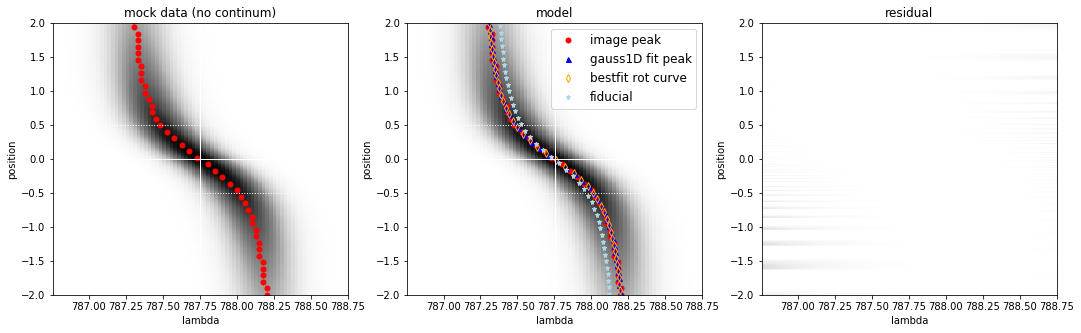

In [54]:
#%matplotlib
%matplotlib inline

ncol=3

fig,ax = plt.subplots(1,ncol,figsize=(18,5))
#ax[0].imshow(np.sum(modelGrid,axis=2))
ax[0].imshow(data ,extent=[v_min, v_MAX, x_min, x_MAX ], aspect='auto',cmap='Greys',vmin=0)
ax[1].imshow(model,extent=[v_min, v_MAX, x_min, x_MAX ], aspect='auto',cmap='Greys',vmin=0)
ax[2].imshow((data-model)/data,extent=[v_min, v_MAX, x_min, x_MAX ], aspect='auto',cmap='Greys',vmin=0)

ax[0].plot(peak_info['peak_loc'][::6]         ,np.flip(fit_tool.grid_pos)[::6],color='red', marker='o', markersize=5,ls='none')

ax[1].plot(peak_info['peak_loc'][::6]         ,np.flip(fit_tool.grid_pos)[::6],color='red', marker='o', markersize=5,ls='none',label='image peak')
ax[1].plot(fitted_peakLoc[3::6]               ,np.flip(fit_tool.grid_pos)[3::6],color='blue', marker='^', markersize=5,ls='none',label='gauss1D fit peak')
ax[1].plot(fit_tool.approxFit_rot_lambda_peak[2::6],np.flip(fit_tool.grid_pos)[2::6],color='orange', marker='d', markersize=5,ls='none',mfc='none',label='bestfit rot curve')
ax[1].plot(fid_rot_lambda_peak[5::6],np.flip(fit_tool.grid_pos)[5::6],color='lightblue', marker='*', markersize=5,ls='none',label='fiducial')


#ax[2].plot(peak_info['peak_loc'][::6],np.flip(fit_tool.grid_pos)[::6],color='red', marker='o', markersize=5,ls='none')
#ax[2].plot(fitted_peakLoc[3::6]       ,np.flip(fit_tool.grid_pos)[3::6],color='blue', marker='^', markersize=5,ls='none')
#ax[2].plot(fit_tool.approxFit_rot_lambda_peak[2::6],np.flip(fit_tool.grid_pos)[2::6],color='orange', marker='d', markersize=5,ls='none',mfc='none')
#ax[2].plot(fid_rot_lambda_peak[5::6],np.flip(fit_tool.grid_pos)[5::6],color='lightblue', marker='*', markersize=5,ls='none')


vcen = lambda0*(1.+redshift)

for j in range(ncol):
    ax[j].axhline(y=0.0,color='white', linestyle='-',lw=1)
    ax[j].axhline(y=0.5,color='white', linestyle=':',lw=1)
    ax[j].axhline(y=-0.5,color='white', linestyle=':',lw=1)
    ax[j].axvline(x=vcen,color='white', linestyle='-',lw=1)
    #ax[j].axvline(x=vcen+100,color='white', linestyle=':',lw=1)
    #ax[j].axvline(x=vcen-100,color='white', linestyle=':',lw=1)
    #ax[j].axvline(x=vcen+200,color='white', linestyle=':',lw=1)
    #ax[j].axvline(x=vcen-200,color='white', linestyle=':',lw=1)
    
    ax[j].set_xlim(vcen-1.0,vcen+1.0)
    ax[j].set_ylim(-2,2)
    ax[j].set_xlabel('lambda')
    ax[j].set_ylabel('position')
    
ax[0].set_title('mock data (no continum)')
ax[1].set_title('model')
ax[2].set_title('residual')

ax[1].legend(loc='best',prop={'size':12})

plt.show()

In [25]:
fit_lambda_peak_max = fit_tool.approxFit_rot_lambda_peak[-1]
fit_lambda_peak_max

788.1984184696615

In [26]:
v_relative = lambda_to_velocity(lambda0,lambda_obs=fit_lambda_peak_max,norm=1,redshift=redshift)
v_relative

203.32226798975898

### rotation curve cp.

In [31]:
v_sys0 = velocity_system(redshift)

In [42]:
lambda_image_peak    = peak_info['peak_loc']
lambda_gaussfit_peak = fitted_peakLoc

v_image_peak = lambda_to_velocity(lambda0,lambda_obs=lambda_image_peak,norm=1,redshift=redshift)
v_gaussfit_peak = lambda_to_velocity(lambda0,lambda_obs=lambda_gaussfit_peak,norm=1,redshift=redshift)

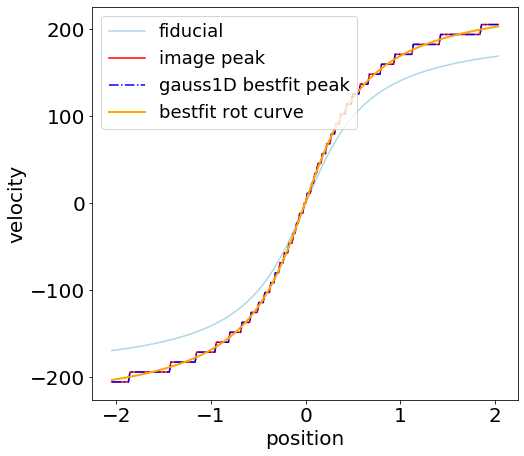

In [49]:
fig = plt.figure(figsize=(7.2,6.5))
plt.rc('font',size=20)

ax1=fig.add_axes([0.16,0.11,0.82,0.84])

ax1.plot(fit_tool.grid_pos,fid_rot_v_peak-v_sys0,label='fiducial',color='lightblue')
ax1.plot(fit_tool.grid_pos,v_image_peak,label='image peak',color='red')
ax1.plot(fit_tool.grid_pos,v_image_peak,label='gauss1D bestfit peak',color='blue',ls="-.")
ax1.plot(fit_tool.grid_pos,fit_tool.approxFit_rot_v_peak-v_sys0,label='bestfit rot curve',color='orange',lw=2)


ax1.set_xlabel('position')
ax1.set_ylabel('velocity')

ax1.legend(loc='best',prop={'size':18})